In [1]:
from transmission_line_simulator import *
import scipy.constants

# Create a curcuit

Firstly, we need to create a topology of our curcuit.
Each element has a type, a name and number of nodes characterized him.
1. element_1 = type()
2. circuit = transmission_line_system()
3. circuit.add_element(element_1, list of nodes)


In [2]:
claw = capacitor()
#qubit_cap = capacitor()
#qubit_inductor = inductor()
source = port()
# analyzer_feedline = transmission_line_coupler(n=1)
analyzer = port()

GND = short()
resonator_short_end = transmission_line_coupler(n=1)
resonator_claw_end = transmission_line_coupler(n=1)
coupler = transmission_line_coupler()

circuit = transmission_line_system()

circuit.add_element(source, [1])
circuit.add_element(coupler, [1, 2, 3, 4])
circuit.add_element(analyzer, [3])
circuit.add_element(resonator_short_end, [4, 0])
circuit.add_element(resonator_claw_end, [2, 5])
circuit.add_element(claw, [5, 0])
#circuit.add_element(qubit_cap, [6, 0])
#circuit.add_element(qubit_inductor, [6, 0])
circuit.add_element(GND, [0])

In [3]:
source.Z0=50
analyzer.Z0=50

coupler.l=0.4e-3
coupler.Ll=np.asarray([[363.456e-9,19.689e-9],
                        [19.689e-9,574.195e-9]])
coupler.Cl=np.asarray([[190.921e-12,-6.547e-12],
                        [-6.547e-12,120.850e-12]])
coupler.Rl=np.zeros(coupler.Ll.shape, dtype=np.int)
coupler.Gl=np.zeros(coupler.Ll.shape, dtype=np.int)


resonator_short_end.l = 3.6e-3
resonator_short_end.Cl = 120.850e-12
resonator_short_end.Ll = 574.195e-9
resonator_short_end.Rl = 0
resonator_short_end.Gl = 0

resonator_claw_end.l = 1.0e-3
resonator_claw_end.Cl = 120.850e-12
resonator_claw_end.Ll = 574.195e-9
resonator_claw_end.Rl = 0
resonator_claw_end.Gl = 0

claw.C=1e-15*0
#qubit_cap.C=70e-15
#qubit_inductor.L=19e-9

In [4]:
from scipy.constants import c,epsilon_0

In [5]:
ep=(11.45+1)/2

In [6]:
1/4/5e-3/1e9/(np.sqrt(147.125e-12*549.103e-9))

5.562882133283824

In [7]:
1/4/5e-3/1e9/(np.sqrt(120.85e-12*574.195e-9))

6.002289989946649

# Simulate scattering parameter S21

In [8]:
nop = 10000
frequency = np.linspace(5.98e9+0j, 6.05e9+0j, nop)
y = np.zeros(nop, dtype=complex)

In [9]:
matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[0]*2*np.pi)
matrix_of_curcuit.shape

(29, 29)

In [10]:
perturbation = np.zeros((matrix_of_curcuit.shape[0],1))
perturbation[0]=1
for i in range(nop):
    matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[i]*2*np.pi)
    s21= np.linalg.solve(matrix_of_curcuit, perturbation)
    y[i]=s21[1]
S21 = 1-y/np.max(y)

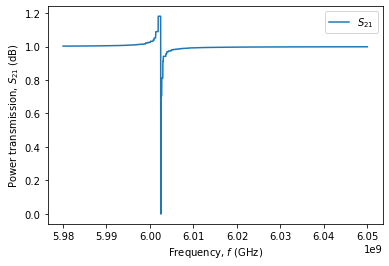

In [11]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(frequency.real, np.abs(S21), label = '$S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.ylabel('Power transmission, $S_{21}$ (dB)')
plt.legend()
plt.show()

In [14]:
import resonator_tools
# from resonator_tools.circuit import notch_port, reflection_port

In [16]:
import

AttributeError: module 'resonator_tools' has no attribute 'notch_port'

In [ ]:
fitter = notch_port(f_data=frequency.real, z_data_raw=S21)

In [ ]:
fitter.autofit()

In [ ]:
fitter.plotall()

In [ ]:
fitter.fitresults

In [ ]:
fitter.GUIfit()